In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\khatr\Downloads\diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


In [3]:
df.shape

(768, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Age                           768 non-null    int64  
 7   Class                         768 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 48.1+ KB


In [5]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


In [6]:
df['Class'].value_counts()

negative    500
positive    268
Name: Class, dtype: int64

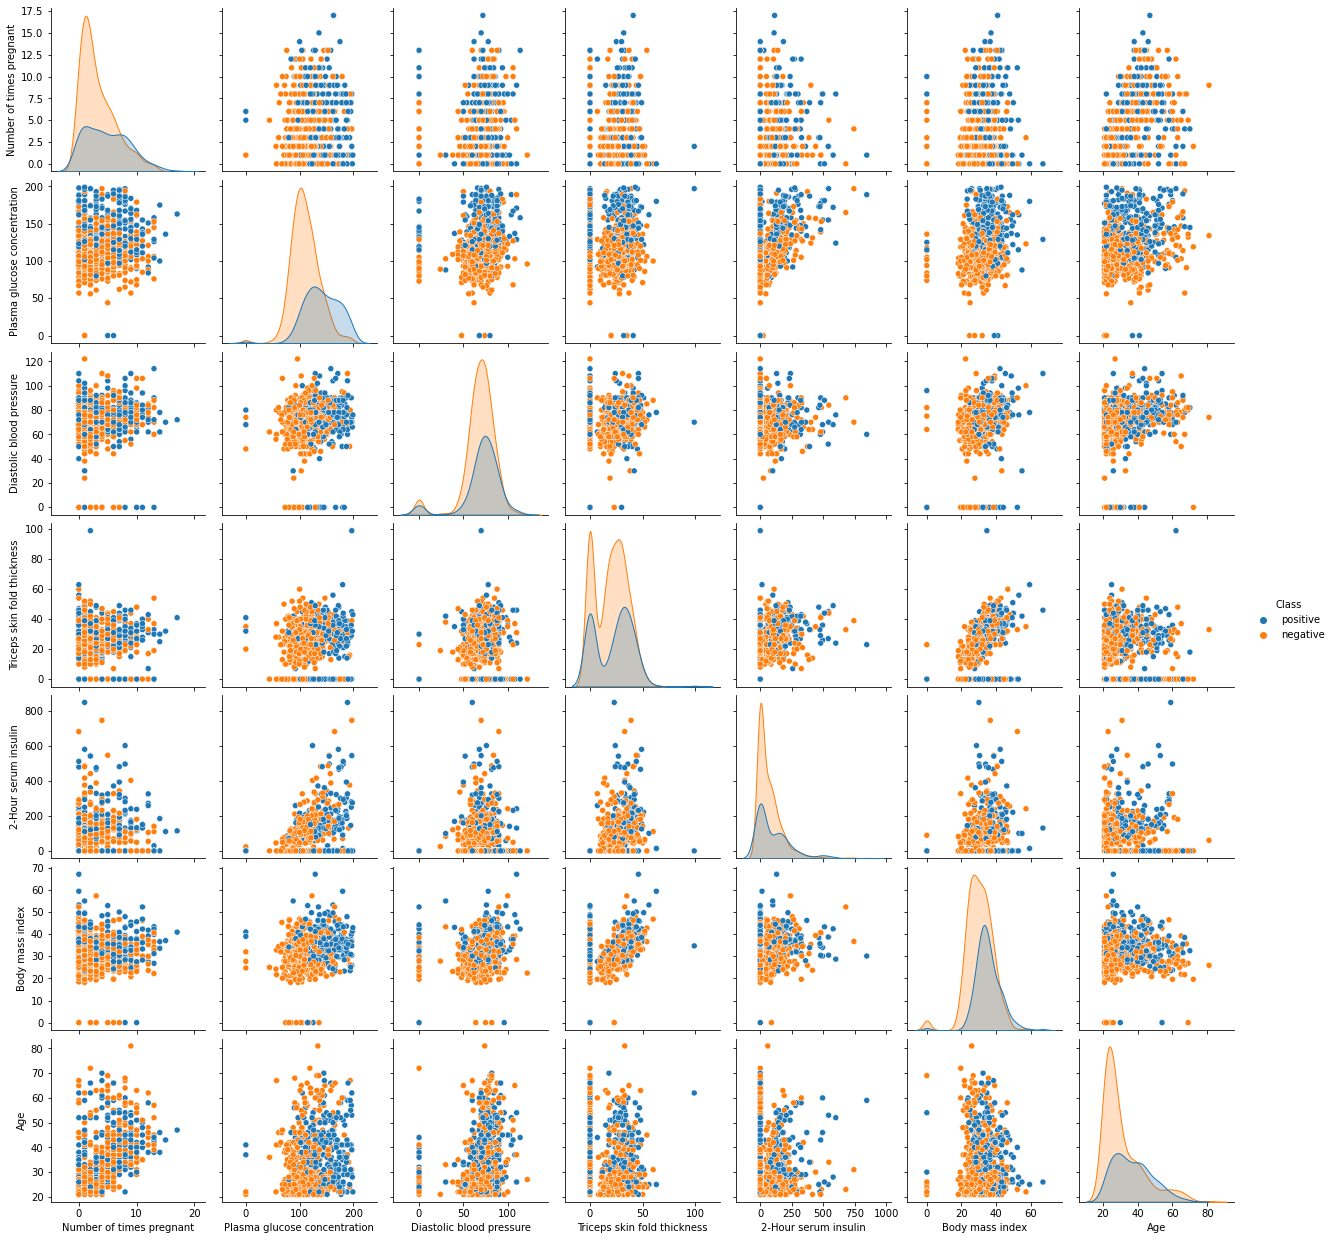

In [7]:
sns.pairplot(df, hue = 'Class')

In [8]:
df = pd.get_dummies(df, columns = ['Class'], drop_first = True)

In [9]:
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class_positive
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [11]:
X = df.drop('Class_positive', axis = 1)
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63
764,2,122,70,27,0,36.8,27
765,5,121,72,23,112,26.2,30
766,1,126,60,0,0,30.1,47


In [12]:
y = df.Class_positive
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class_positive, Length: 768, dtype: uint8

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.87137393]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
pred = model.predict(x_test)

In [28]:
from  sklearn.metrics import accuracy_score, mean_squared_error
AccuracyScore= accuracy_score(y_test, pred)
Error= mean_squared_error(y_test , pred)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[92, 21],
       [17, 24]], dtype=int64)

In [31]:
model.score(x_test, y_test)

0.7532467532467533